### **Part 1: Understanding Product Categories**

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
#Load the data
df = pd.read_csv('/Users/mac/IronHacks/W2/D4/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [36]:
print("Informações do dataset:")
display(df.info())

print("\nValores nulos:")
df.isnull().sum()

print("Colunas disponíveis:")
df.columns.tolist()

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


None


Valores nulos:
Colunas disponíveis:


['uid',
 'asin',
 'title',
 'stars',
 'reviews',
 'price',
 'isBestSeller',
 'boughtInLastMonth',
 'category']

In [41]:
# 1.2 Top 5 categorias
top_5_cat = categoria_freq.head(5)
print("\nTop 5 categories:")
print(top_5_cat)


Top 5 categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


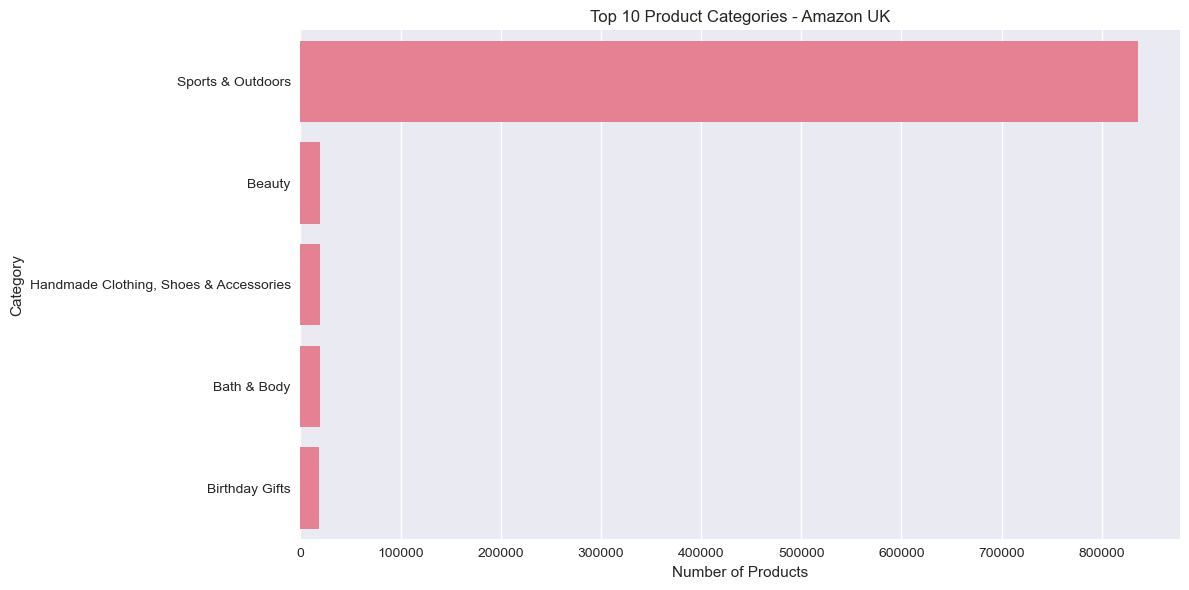

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_cat.values, y=top_5_cat.index)
plt.title('Top 10 Product Categories - Amazon UK')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

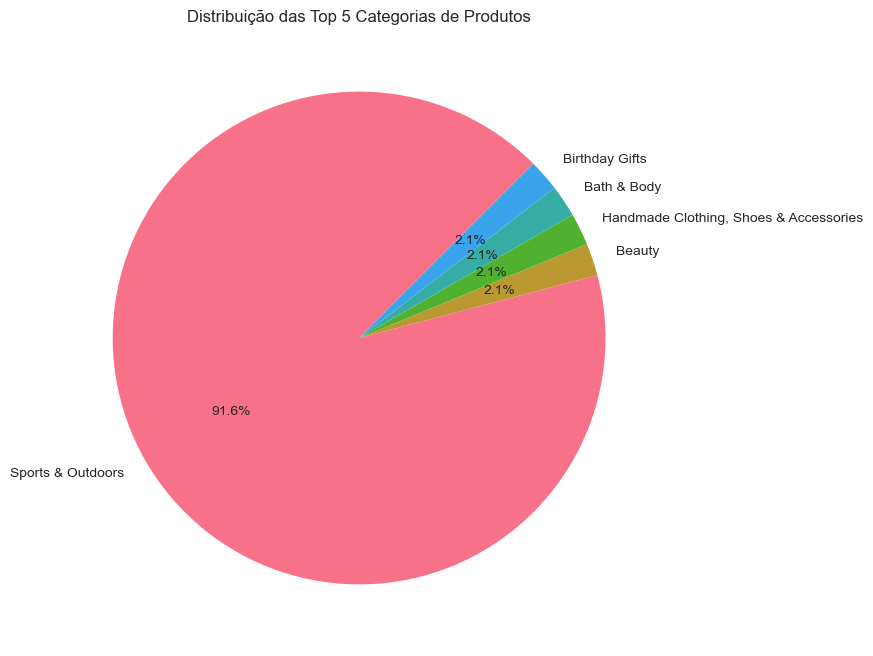

In [71]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_cat.values, labels=top_5_cat.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribuição das Top 5 Categorias de Produtos')
plt.show()

## **Part 2: Delving into Product Pricing**

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

1. Measures of Centrality: 

    Calculate the mean, median, and mode for the price of products.

    **Q1 -** What's the average price point of products listed? 

    **Q2 -** How does this compare with the most common price point (mode)?


In [114]:
mean_price = df['price'].mean().round(2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print('The Average Price is £',mean_price)
print('The Median Price is £',median_price)
print('The Mode Price is £', mode_price)

The Average Price is £ 89.24
The Median Price is £ 19.09
The Mode Price is £ 9.99


**Q1:**

 What's the average price point of products listed?

In [115]:
print('The Average Price is £',mean_price)

The Average Price is £ 89.24


**Q2**

How does this compare with the most common price point (mode)?

In [116]:
price_difference = mean_price - mode_price
percentage_difference = (price_difference / mode_price) * 100

print(f"\nCOMPARISON ANALYSIS:\n")
print(f"Average price (£{mean_price:.2f}) vs Most common price (£{mode_price:.2f})\n")
print(f"Difference: £{price_difference:.2f}\n")
print(f"The average is {percentage_difference:.1f}% higher than the most common price\n")

if price_difference > 0:
    print(f"This indicates that a few high-priced products are pulling the average up")
else:
    print(f"This indicates that low-priced products dominate the marketplace")


COMPARISON ANALYSIS:

Average price (£89.24) vs Most common price (£9.99)

Difference: £79.25

The average is 793.3% higher than the most common price

This indicates that a few high-priced products are pulling the average up



2.  Measures of Dispersion: 

    Determine the variance, standard deviation, range, and interquartile range for product price.

    **Q1 -** How varied are the product prices? 

    **Q2 -** Are there any indicators of a significant spread in prices?



In [117]:
price_data = df['price']

variance = price_data.var()
std_dev = price_data.std()
data_range = price_data.max() - price_data.min()
q1 = price_data.quantile(0.25)
q3 = price_data.quantile(0.75)
iqr = q3 - q1
mean_price = price_data.mean()
cv = (std_dev / mean_price) * 100


**Q1:**

How varied are the product prices? 

In [118]:
print(f"Price Range: £{price_data.min():.2f} to £{price_data.max():.2f}")
print(f"Standard Deviation: £{std_dev:.2f} ({(std_dev/mean_price)*100:.1f}% of mean)")
print(f"CV: {cv:.1f}% ({'Extreme' if cv > 100 else 'High' if cv > 50 else 'Moderate'} variability)")
print(f"IQR Range: £{q1:.2f} to £{q3:.2f} (£{iqr:.2f} spread for middle 50%)")

if cv > 100:
    variability_level = "EXTREME"
elif cv > 50:
    variability_level = "HIGH" 
else:
    variability_level = "MODERATE"

print(f"• Variability Level: {variability_level}")

Price Range: £0.00 to £100000.00
Standard Deviation: £345.61 (387.3% of mean)
CV: 387.3% (Extreme variability)
IQR Range: £9.99 to £45.99 (£36.00 spread for middle 50%)
• Variability Level: EXTREME


**Q2**

Are there any indicators of a significant spread in prices?

In [122]:
print("INDICATORS OF SIGNIFICANT PRICE SPREAD:\n")
print(f"Variance: {variance:,.2f} - Indicates massive dispersion\n")
print(f"Standard Deviation: £{std_dev:.2f} - Shows wide variation from mean\n")
print(f"Range: £{data_range:.2f} - Demonstrates extreme price differences\n") 
print(f"IQR: £{iqr:.2f} - Middle 50% of prices span £{iqr:.2f}\n")
print(f"Coefficient of Variation: {cv:.1f}% - Confirms extreme variability\n")
print(f"Std Dev/Mean Ratio: {std_dev/mean_price:.1f}x - Standard deviation is {std_dev/mean_price:.1f} times larger than mean")

INDICATORS OF SIGNIFICANT PRICE SPREAD:

Variance: 119,445.49 - Indicates massive dispersion

Standard Deviation: £345.61 - Shows wide variation from mean

Range: £100000.00 - Demonstrates extreme price differences

IQR: £36.00 - Middle 50% of prices span £36.00

Coefficient of Variation: 387.3% - Confirms extreme variability

Std Dev/Mean Ratio: 3.9x - Standard deviation is 3.9 times larger than mean


Answer: Yes, all indicators confirm significant price spread with extreme variability across all measures.

3. Visualizations:

    **Q1** Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.
    


Most products cost between: £9.99 and £45.99
That's 50% of all products in this range!


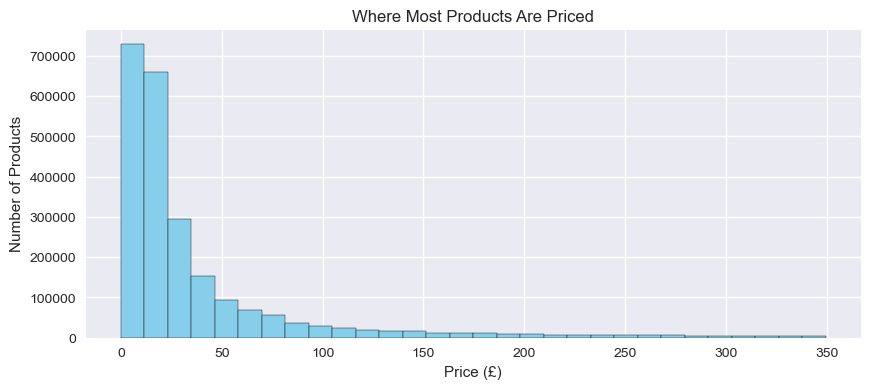

In [123]:

price_data = df['price']
low_price = price_data.quantile(0.25)  # 25% of products are cheaper than this
high_price = price_data.quantile(0.75) # 75% of products are cheaper than this

print(f"Most products cost between: £{low_price:.2f} and £{high_price:.2f}")
print(f"That's 50% of all products in this range!")


plt.figure(figsize=(10, 4))

# Look at 95% of products (remove the super expensive ones)
most_products = price_data[price_data <= price_data.quantile(0.95)]
plt.hist(most_products, bins=30, color='skyblue', edgecolor='black')
plt.title('Where Most Products Are Priced')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.show()

 **Q2** Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

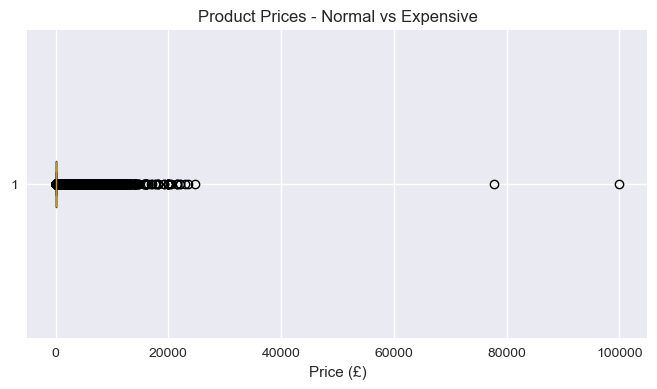

Normal price range: up to £99.99
Expensive products: 327688 products above £99.99
Most expensive: £100000.00


In [127]:
# Simple box plot
plt.figure(figsize=(8, 4))
plt.boxplot(price_data, vert=False)
plt.title('Product Prices - Normal vs Expensive')
plt.xlabel('Price (£)')
plt.show()

# Find the expensive products
Q3 = price_data.quantile(0.75)
IQR = price_data.quantile(0.75) - price_data.quantile(0.25)
expensive_threshold = Q3 + 1.5 * IQR

expensive_products = price_data[price_data > expensive_threshold]

print(f"Normal price range: up to £{expensive_threshold:.2f}")
print(f"Expensive products: {len(expensive_products)} products above £{expensive_threshold:.2f}")
print(f"Most expensive: £{price_data.max():.2f}")

### **Part 3: Unpacking Product Ratings**

Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. Measures of Centrality:

    Q1 - Calculate the mean, median, and mode for the rating of products.
    Q2 - How do customers generally rate products? Is there a common trend?

2. Measures of Dispersion:

    Determine the variance, standard deviation, and interquartile range for product rating.

    Q1 - Are the ratings consistent, or is there a wide variation in customer feedback?

3. Shape of the Distribution:

    Calculate the skewness and kurtosis for the rating column.

    Q2 - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. Visualizations:

    Q1 - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [ ]:
ratings = df['stars'].dropna()

1. Measures of Centrality:

    Q1 - Calculate the mean, median, and mode for the rating of products.

    Q2 - How do customers generally rate products? Is there a common trend?

In [135]:
print("\n1. MEASURES OF CENTRALITY:")
mean_rating = ratings.mean()
median_rating = ratings.median()
mode_rating = ratings.mode()[0]

print(f"• Mean: {mean_rating:.2f}/5")
print(f"• Median: {median_rating:.2f}/5")
print(f"• Mode: {mode_rating:.2f}/5")

print("\nQ1 - How do customers generally rate products?")
print(f"Customers generally rate products {mean_rating:.2f}/5")

print("\nQ2 - Is there a common trend?")
print(f"Yes, the most common rating is {mode_rating}/5")


1. MEASURES OF CENTRALITY:
• Mean: 2.15/5
• Median: 0.00/5
• Mode: 0.00/5

Q1 - How do customers generally rate products?
Customers generally rate products 2.15/5

Q2 - Is there a common trend?
Yes, the most common rating is 0.0/5


2. Measures of Dispersion:

    Determine the variance, standard deviation, and interquartile range for product rating.

    Q1 - Are the ratings consistent, or is there a wide variation in customer feedback?

In [136]:
print("\n2. MEASURES OF DISPERSION:")
variance_rating = ratings.var()
std_rating = ratings.std()
iqr_rating = ratings.quantile(0.75) - ratings.quantile(0.25)

print(f"• Variance: {variance_rating:.4f}")
print(f"• Standard Deviation: {std_rating:.4f}")
print(f"• IQR: {iqr_rating:.4f}")

print("\nQ1 - Are the ratings consistent?")
if std_rating < 0.5:
    print("Yes, ratings are very consistent")
else:
    print("No, there is some variation in ratings")


2. MEASURES OF DISPERSION:
• Variance: 4.8174
• Standard Deviation: 2.1949
• IQR: 4.4000

Q1 - Are the ratings consistent?
No, there is some variation in ratings


3. Shape of the Distribution:

    Calculate the skewness and kurtosis for the rating column.
    
    Q1 - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [137]:
print("\n3. SHAPE OF DISTRIBUTION:")
skewness = ratings.skew()
kurtosis = ratings.kurtosis()

print(f"• Skewness: {skewness:.4f}")
print(f"• Kurtosis: {kurtosis:.4f}")

print("\nQ1 - Are ratings normally distributed?")
if abs(skewness) < 0.5:
    print("Yes, ratings are roughly normally distributed")
elif skewness < 0:
    print("No, ratings lean towards higher values")
else:
    print("No, ratings lean towards lower values")


3. SHAPE OF DISTRIBUTION:
• Skewness: 0.0812
• Kurtosis: -1.9260

Q1 - Are ratings normally distributed?
Yes, ratings are roughly normally distributed


4. Visualizations:

    Q1 - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


4. VISUALIZATIONS:


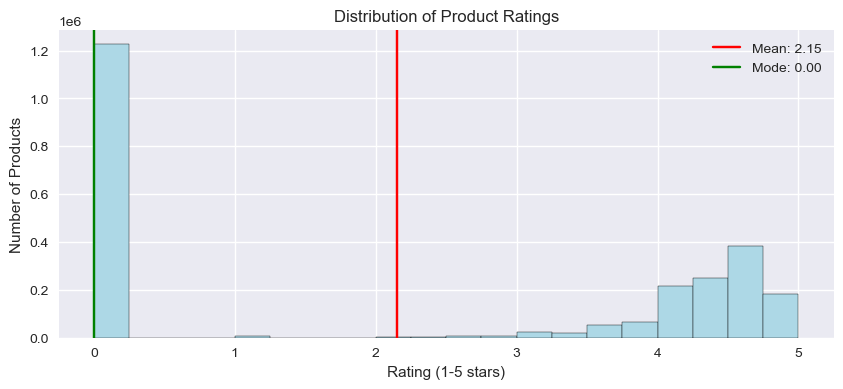

Q1 Is there a specific rating that is more common?
Yes, 0.0/5 is the most common rating


In [141]:
print("\n4. VISUALIZATIONS:")
plt.figure(figsize=(10, 4))
plt.hist(ratings, bins=20, color='lightblue', edgecolor='black')
plt.axvline(mean_rating, color='red', linestyle='-', label=f'Mean: {mean_rating:.2f}')
plt.axvline(mode_rating, color='green', linestyle='-', label=f'Mode: {mode_rating:.2f}')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Number of Products')
plt.legend()
plt.show()

print("Q1 Is there a specific rating that is more common?")
print(f"Yes, {mode_rating}/5 is the most common rating")